# Data Assessing

### Problem Statement

This project analyzes how market sentiment (Fear vs Greed) influences trader behavior and performance using Hyperliquid historical trading data and Bitcoin Fear–Greed sentiment data.

**The goal is to:**
1. Understand behavioral changes across sentiment regimes
2. Measure performance differences
3. Identify trader segments
4. Derive actionable strategy insights

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
trades = pd.read_csv(r"C:\Users\Hrish\Downloads\Company-Assignments\Assignment_5\PrimeTrade.ai\trader-sentiment-analysis\historical_data.csv")
sentiment = pd.read_csv(r"C:\Users\Hrish\Downloads\Company-Assignments\Assignment_5\PrimeTrade.ai\trader-sentiment-analysis\fear_greed_index.csv")

In [5]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
trades.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [7]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-2018
1,1517549400,15,Extreme Fear,02-02-2018
2,1517635800,40,Fear,03-02-2018
3,1517722200,24,Extreme Fear,04-02-2018
4,1517808600,11,Extreme Fear,05-02-2018


In [8]:
trades.shape

(211224, 16)

In [9]:
sentiment.shape

(2644, 4)

In [11]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [12]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [13]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [19]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [23]:
trades.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [25]:
sentiment.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


## Dataset Overview

Two datasets are used in this analysis:

1. **Trader Dataset**
   Contains trade-level information such as account, coin, execution price, trade size, side, timestamp, and closed PnL.

2. **Market Sentiment Dataset**
   Contains daily Bitcoin market sentiment classified as Fear or Greed.


# Overall Understanding
* **objective** / **Goal**:
  * To analyze how bitcoin market sentiment(Fear Vs Greed) influences trader performance and behavior to identify hidden behavioral patterns and extract insights that can inform smater sentiment-aware trading strategies.
* To achieve this goal the only meaningful columns we need are:
  * From **trades dataset:**
      * Account
      * Coin
      * Execution Price
      * Size USD
      * Side
      * Trade ID
      * Timestamp IST
      * Closed PnL
  * From **sentiment dataset:**
      * date
      * classification (Fear/Greed)
* Why:
  * These features are those, which are directly relevent for analyzing trader performance and behavior under **Fear** and **Greed** market sentiment.
  * **Closed PnL** is to measure the trade performance, while **Size USD** as a proxy for **risk exposure** and **capital deployment**.
  * **Account** and **Timestamp** enabled trader-level aggregation and alignment with daily sentiment data.
  * **Side** and **Coin** were retained for behavioral and contextual interpretation.
  * The **date** from **sentiment dataset** as it is reported at a daily level which will be aling to each trade.
  * And the **classification** column(Fear/Greed) provides the necessary sentiment label for analyzing trader behavior.
* Non-informative identifier columns were excluded to reduce noise and maintain analytical clarity.

#

# Data Preprocessing
1) Remove unwanted columns:
  * Dropped columns not relevent to performance or behavioral analysis to reduce noise, improves readability and to ensure the analysis focused on **trader performance** and **risk behaviour**.
2) Datatime Handling:
  * To convert **trades timestamps** and **sentiment dates** into common **data format** as **Fear & Greed Index** is on a daily basis, while **trades** occur at a transaction level.
3) Merge the **historical trade data** with the **market sentiment dataset**:
  * How:
    * Will join the datasets using **left-JOIN**, treating the **trades** as the primary unit.

In [33]:
# Keeping only the relevent columns
trades = trades[[
    'Account',
    'Coin',
    'Execution Price',
    'Size USD',
    'Side',
    'Trade ID',
    'Timestamp IST',
    'Closed PnL'
]]

In [35]:
trades.head()

,Account,Coin,Execution Price,Size USD,Side,Trade ID,Timestamp IST,Closed PnL
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,8.950000e+14,02-12-2024 22:50,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,4.430000e+14,02-12-2024 22:50,0.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,6.600000e+14,02-12-2024 22:50,0.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,1.080000e+15,02-12-2024 22:50,0.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,1.050000e+15,02-12-2024 22:50,0.0


In [37]:
# Convert Timestamp IST from string → datetime

trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format = '%d-%m-%Y %H:%M',
    errors = 'coerce'
)

In [39]:
trades['Timestamp IST'].isna().sum()

0

In [41]:
# Create Trade Date for Granularity Alignment

trades['trade_date'] = trades['Timestamp IST'].dt.date

In [43]:
trades.head()

,Account,Coin,Execution Price,Size USD,Side,Trade ID,Timestamp IST,Closed PnL,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,8.950000e+14,2024-12-02 22:50:00,0.0,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,4.430000e+14,2024-12-02 22:50:00,0.0,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,6.600000e+14,2024-12-02 22:50:00,0.0,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,1.080000e+15,2024-12-02 22:50:00,0.0,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,1.050000e+15,2024-12-02 22:50:00,0.0,2024-12-02


In [45]:
# Now for sentiment dataset

sentiment['date'] = pd.to_datetime(sentiment['date'], format= '%d-%m-%Y')
sentiment['sentiment_date'] = sentiment['date'].dt.date

sentiment = sentiment[['sentiment_date', 'classification']]

In [47]:
# merging both the datasets

df = trades.merge(
    sentiment,
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)

In [49]:
df.head()

,Account,Coin,Execution Price,Size USD,Side,Trade ID,Timestamp IST,Closed PnL,trade_date,sentiment_date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,8.950000e+14,2024-12-02 22:50:00,0.0,2024-12-02,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,4.430000e+14,2024-12-02 22:50:00,0.0,2024-12-02,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,6.600000e+14,2024-12-02 22:50:00,0.0,2024-12-02,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,1.080000e+15,2024-12-02 22:50:00,0.0,2024-12-02,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,1.050000e+15,2024-12-02 22:50:00,0.0,2024-12-02,2024-12-02,Extreme Greed


In [51]:
df.shape

(211224, 11)

In [53]:
df.isnull().sum()

Account            0
Coin               0
Execution Price    0
Size USD           0
Side               0
Trade ID           0
Timestamp IST      0
Closed PnL         0
trade_date         0
sentiment_date     6
classification     6
dtype: int64

In [55]:
(df[df['classification'].isna()]['trade_date'].unique())

array([datetime.date(2024, 10, 26)], dtype=object)

In [57]:
(df[df['sentiment_date'].isna()]['trade_date'].unique())

array([datetime.date(2024, 10, 26)], dtype=object)

# After merging --> observation
* The no.of trades that occurred as null is verylikely the dates that does not got covered by the sentiment dataset (for-> '26-Oct-2024').
* So, these trades will be excluded as they do not contribute to our sentiment based analysis.
* Since sentiment is reported at a daily frequency, aligning trades to the corresponding day provides a reasonable approximation of prevailing market sentiment at the time of trading.


In [60]:
# Removing trades that could not be matched to sentiment.
df = df.dropna(subset=['classification'])

In [62]:
df.isnull().sum()

Account            0
Coin               0
Execution Price    0
Size USD           0
Side               0
Trade ID           0
Timestamp IST      0
Closed PnL         0
trade_date         0
sentiment_date     0
classification     0
dtype: int64

## Key Metrics Defined
* Closed PnL → profitability measure
* Win rate → fraction of profitable trades
* Risk exposure → trade size in USD
* Trade frequency → number of trades per trader

# Feature Engineering

#### Thought process and assumptions:
* The trade dataset contains **raw profit and loss** values in **Closed PnL**, but these values alone do not clearly indicate weather
  the trade was successful or unsuccessful, especially when comparing performance across different sentiment regimes.
* Many trades have small profit or losses, while a few trades exhibit very large values, which can be distort **average-based analysis**, this makes it necessary to seperate trade direction as in **profit or loss** from the magnitude of the outcome.
* The trade outcome also influenced by how much capital was deployed in each trade, so the **profit or loss** needs to be interpreted in the context of the trade size rather than in isolation.
* Additionally, analyzing individual trades alone does not fully capture trader behavior so, aggregating **trade-level outcomes** at the trader level is required to identify sonsistent pattern and behavioral difference accross market sentiment conditions.

##### is_profitable (Win/Lose flag)
* why:
  * counting wins Vs losses is more stable than money
  * 10 small wins > 1 big lucky win

In [68]:
df['is_profitable'] = df['Closed PnL'] > 0

##### abs_pnl (How painful or good was it?)
* Why:
  * because fear markets are known for:
    * Panic selling
    * Big losses
* By this we want to check -> Are losses bigger during Fear?

In [71]:
df['abs_pnl'] = df['Closed PnL'].abs()

##### risk_exposure_usd (How much money was put in)
* Using **trade size** as risk
  * Why:
    * Because **₹ 100** loss on a **₹ 1000** trade is not equal to **₹ 100** loss on **₹ 1,00,000**.
* Or basically **how much money did the trader put on the line?**

In [74]:
df['risk_exposure_usd'] = df['Size USD']

# Trader-level summary

##### Uptill now we were looking at the individual trades but now we need to understand the traders behavior for all trades not for a **single lucky trades**.

In [78]:
trader_summary = df.groupby('Account').agg(
    total_pnl = ('Closed PnL','sum'),
    avg_trade_size = ('Size USD','mean'),
    win_rate = ('is_profitable','mean'),
    trade_count = ('Closed PnL','count')
).reset_index()

* For each trader we calculated:
  * **total_pnl** -> To understand overall **profit/loss**
  * **avg_trade_size** -> To understand the **risk-taking habit**.
  * **win_rate** -> To understand **how often they win**.
  * **trade_count** -> To understand the traders **experience/activity**.

# Trader segmentation (Who is good, who is not)

##### Label traders as:
     Profitable
     Losing
* Good traders react differently to Fear/Greed
* Bad traders panic more

Why segmentation matters:
* Not all traders behave the same
* Strategy insights depend on trader type

In [84]:
trader_summary['trader_type'] = trader_summary['total_pnl'].apply(
    lambda x: 'Profitable Trader' if x > 0 else 'Losing Trader'
)

In [86]:
# attaching the lebels back

df = df.merge(
    trader_summary[['Account','trader_type']],
    on = 'Account',
    how = 'left'
)

In [88]:
df.head()

,Account,Coin,Execution Price,Size USD,Side,Trade ID,Timestamp IST,Closed PnL,trade_date,sentiment_date,classification,is_profitable,abs_pnl,risk_exposure_usd,trader_type
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,8.950000e+14,2024-12-02 22:50:00,0.0,2024-12-02,2024-12-02,Extreme Greed,False,0.0,7872.16,Profitable Trader
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,4.430000e+14,2024-12-02 22:50:00,0.0,2024-12-02,2024-12-02,Extreme Greed,False,0.0,127.68,Profitable Trader
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,6.600000e+14,2024-12-02 22:50:00,0.0,2024-12-02,2024-12-02,Extreme Greed,False,0.0,1150.63,Profitable Trader
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,1.080000e+15,2024-12-02 22:50:00,0.0,2024-12-02,2024-12-02,Extreme Greed,False,0.0,1142.04,Profitable Trader
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,1.050000e+15,2024-12-02 22:50:00,0.0,2024-12-02,2024-12-02,Extreme Greed,False,0.0,69.75,Profitable Trader


In [90]:
df.tail()

,Account,Coin,Execution Price,Size USD,Side,Trade ID,Timestamp IST,Closed PnL,trade_date,sentiment_date,classification,is_profitable,abs_pnl,risk_exposure_usd,trader_type
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,420.80,SELL,1.990000e+14,2025-04-25 15:35:00,-20.2566,2025-04-25,2025-04-25,Greed,False,20.2566,420.80,Profitable Trader
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2338.63,SELL,9.260000e+14,2025-04-25 15:35:00,-112.5773,2025-04-25,2025-04-25,Greed,False,112.5773,2338.63,Profitable Trader
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,466.16,SELL,6.930000e+14,2025-04-25 15:35:00,-22.4402,2025-04-25,2025-04-25,Greed,False,22.4402,466.16,Profitable Trader
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3963.38,SELL,4.180000e+14,2025-04-25 15:35:00,-190.7894,2025-04-25,2025-04-25,Greed,False,190.7894,3963.38,Profitable Trader
211217,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1119.83,SELL,3.270000e+14,2025-04-25 15:35:00,-53.9063,2025-04-25,2025-04-25,Greed,False,53.9063,1119.83,Profitable Trader


#### Each column answers ONE question:

| Column        | Question it answers        |
| ------------- | -------------------------- |
| Closed PnL    | Profit or loss             |
| is_profitable | Win or lose                |
| abs_pnl       | How big was the impact     |
| Size USD      | How risky was the trade    |
| trader_type   | Is this trader good or bad |

* Profitability flags capture win/loss outcomes, while absolute PnL measures the severity of trade outcomes, enabling analysis of loss intensity and risk behavior under different market sentiment regimmes.

# Visualization & Insight Extraction

#### 1) Average Trader Performance Vs Market Sentiments:
* Comparing average **Closed PnL** accross different market sentiment regimes (Fear Vs Greed).
* Why:
  * As raw data does not immediately reveal whether trades perform better during Fear or Greed.
  * And average provides a first-level comparison of overall performance under different sentiment conditions.

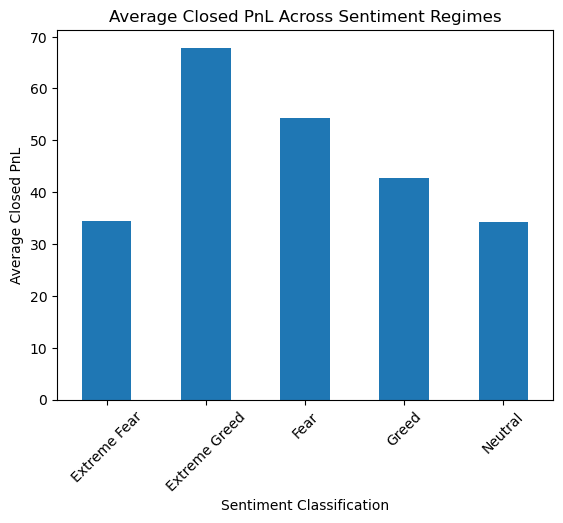

In [95]:
ax = df.groupby('classification')['Closed PnL'].mean().plot(kind='bar')

ax.set_title('Average Closed PnL Across Sentiment Regimes')
ax.set_xlabel('Sentiment Classification')
ax.set_ylabel('Average Closed PnL')

plt.xticks(rotation=45)
plt.show()

#### Observation:
* **Extreme Greed** -> **highest average PnL**
* **Fear** -> **second highest**
* **Greed** -> **moderate**
* **Neutral** -> **lower**
* **Extreme Fear** -> **lower average PnL**
##### The **traders profitability** increases as market sentiment shifts toward **Greed**, and is **weakest** during **Extreme Fear**.

#### 2) Win Rate Vs market Sentiment

##### Why:
* As **Average PnL** can be misleading duw to a few extreme trades.
* Win rate shows **consistency of success** independent of trade size. 

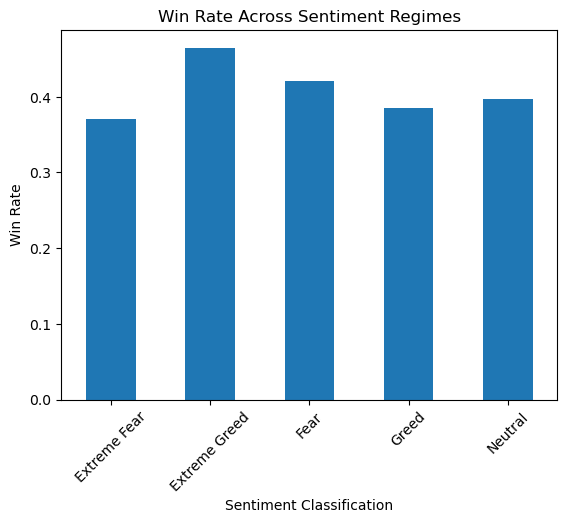

In [100]:
ax = df.groupby('classification')['is_profitable'].mean().plot(kind='bar')

ax.set_title('Win Rate Across Sentiment Regimes')
ax.set_xlabel('Sentiment Classification')
ax.set_ylabel('Win Rate')

plt.xticks(rotation=45)
plt.show()

#### Observation:
* **Extreme Greed** -> **highest win rate**
* **Fear** -> **second highest**
* **Neutral** -> **moderate**
* **Greed** -> **slightly lower**
* **Extreme Fear** -> **lowest win rate**
##### **Traders** win more frequently during **Greed and Extreme Greed** conditions, and least frequently during **Extreme Fear**.

#### 3) Distribution of Trade Outcomes by Sentiment (Loss Severity)
* Why:
  * Markets driven by fear are often associated with panic-driven behavior, which may not increase losses in number but can increase **loss severity**.

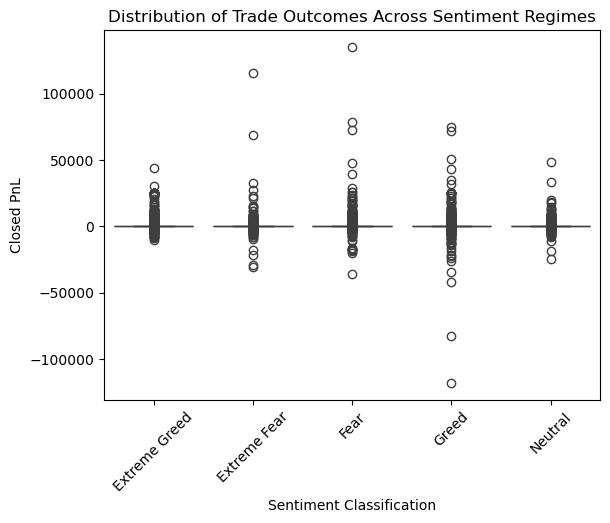

In [104]:
import seaborn as sns

ax = sns.boxplot(x='classification', y='Closed PnL', data=df)

ax.set_title('Distribution of Trade Outcomes Across Sentiment Regimes')
ax.set_xlabel('Sentiment Classification')
ax.set_ylabel('Closed PnL')

plt.xticks(rotation=45)
plt.show()

#### Observations:
* Most trades are clustered close to **zero PnL**, which means:
  * many small wins and losses
  * very few large outcomes
* For **Greed**:
  * the downside tail (large negative values) is much longer.
  * there are very large negative outliers (deep losses).
  * Losses extend further downward compared to other regimes.
##### During **Greed**, traders sometimes take positions that lead to extremely large losses even if average performance looks decent.

#### 4) Risk-Taking Behavior Vs Market Sentiment
* Comparing **trade size (Size USD)** across sentiment regimes.
* Why:
  * Trader behavior changes with sentiment.
  * **Greed** often leads to higher risk-taking, while **Fear** may reduce position size or cause forced exits.

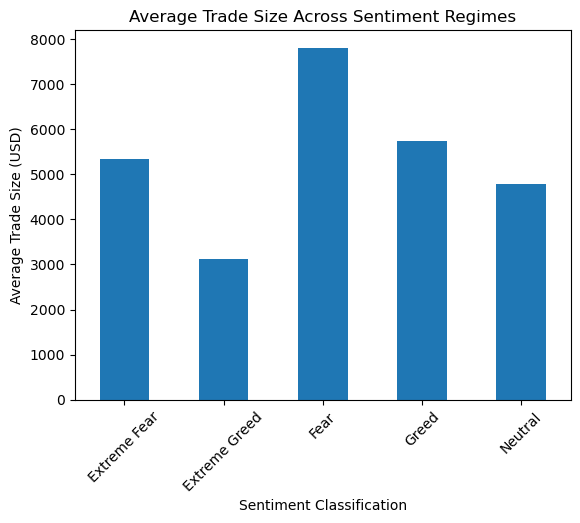

In [108]:
ax = df.groupby('classification')['Size USD'].mean().plot(kind='bar')

ax.set_title('Average Trade Size Across Sentiment Regimes')
ax.set_xlabel('Sentiment Classification')
ax.set_ylabel('Average Trade Size (USD)')

plt.xticks(rotation=45)
plt.show()

# Observation:
* The above **bar chart** shows how much money traders put into a trade when the market feels **Fear** Vs **Greed**.
* From the bar heights:
 * **Fear** -> **highest average trade size**
 * **Greed** -> **second highest**
 * **Extreme Fear** -> **moderate**
 * **Neutral** -> **lower**
 * **Extreme Greed** -> **Lowest average trade size**
##### **Traders** deploy large position size during **Fear** and **Greed**, but reduce trade size during **Extreme Greed**.

#### 5) Trader-Type Behavior Across Sentiment (Hidden Pattern Discovery)
* Comparing performance and risk behavior of **Profitable Traders** Vs **Losing Traders** across sentiment regimes.
* Why:
  * As not all traders respond to sentiment in the same way.
  * And consistently profitable traders may manage risk better during **Fear**, while losing traders may behave emotionally.

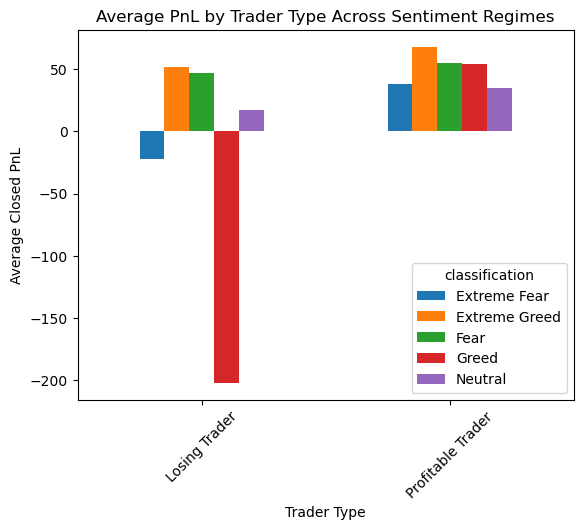

In [112]:
ax = df.groupby(['trader_type','classification'])['Closed PnL'].mean().unstack().plot(kind='bar')

ax.set_title('Average PnL by Trader Type Across Sentiment Regimes')
ax.set_xlabel('Trader Type')
ax.set_ylabel('Average Closed PnL')

plt.xticks(rotation=45)
plt.show()

#### Observation:
  * The above chart compares **average Closed PnL** across:
    * Trader type:
      * Losing trader
      * Profitable trader
    * Market sentiment:
      * Extreme Fear
      * Fear
      * Neutral
      * Greed
      * Extreme Greed
* From **Profitable Traders** bars:
  * they all are positive across all sentiment regimes.
  * **Extreme Greed** shows the **highest average PnL**.
  * **Fear and Greed** still remain strongly positive.
  * Even during **Extreme Fear**, profitable traders remain profitable.
##### Profitable traders maintain positive performance regardless of sentiment, indicating better risk control and adaptability.
#####
* From **losing Traders** bars:
  * **Greed** shows a very large negative average PnL.
  * Losses during **Greed** are far worse than during **Fear or Extreme Fear**.
  * Even when sentiment is positive, losing traders perform badly.
##### Losing traders suffer their most severe losses during **Greed,suggesting overconfidence and poor risk management** in optimistic market conditions.
#####
## The Hidden Pattern:
* Earlier plot showed:
  * **Greed** has higher average PnL.
  * **Greed** has higher win rate.
* This plot now reveals:
  * who actually benefits from **Greed**.
  * who gets hurts by **Greed**.
##### So, **Greed** amplifies difference between good and bad traders where:
 * **Good traders** -> **performs** even better.
 * **Bad traders** -> **loses much more**.
#####
##### Strategy Implecations:
* Based on these observations:
  * Sentiment-aware strategies should be trader-specific.
  * Risk limits during **Greed** are especially important for weaker traders.
  * Copy-trading or signal strategies should prioritize behavior observed in profitable tradres during **Greed**.

### 6) Trade Activity Across Sentiment Regimes

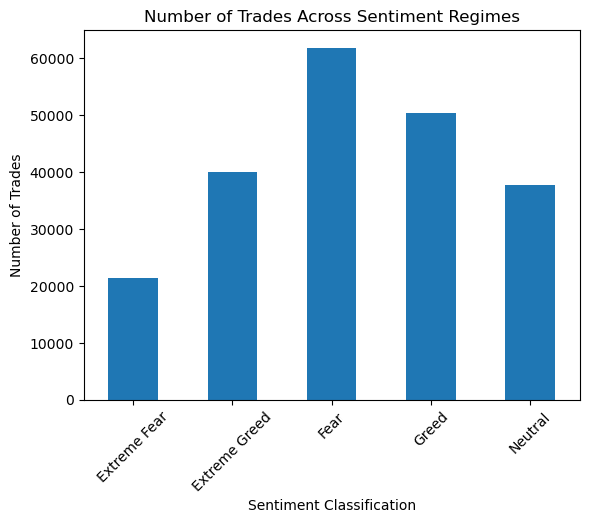

In [116]:
ax = df.groupby('classification')['Trade ID'].count().plot(kind='bar')

ax.set_title('Number of Trades Across Sentiment Regimes')
ax.set_xlabel('Sentiment Classification')
ax.set_ylabel('Number of Trades')

plt.xticks(rotation=45)
plt.show()

#### Observation:
The number of trades varies across sentiment regimes.
Trading activity is highest during Fear conditions, followed by Greed, while Extreme Fear shows the lowest participation.
#### Interpretation:
Higher trading activity during Fear periods may indicate increased market volatility, which often attracts both speculative and defensive trading behavior. Traders may also adjust positions more frequently in uncertain market conditions.
#### Implication:
Market sentiment appears to influence trader participation. Periods of heightened uncertainty or strong directional movement encourage more active trading behavior.

#### Note:
Although the assignment focuses on Fear vs Greed, additional sentiment classes such as Extreme Fear and Extreme Greed were retained to preserve behavioral granularity.

#### Key Insights

* Trader profitability varies across sentiment regimes.
* Loss severity increases significantly during Greed periods.
* Traders deploy larger capital during Fear and Greed conditions.
* Profitable traders maintain stable performance across sentiment regimes, indicating better risk control.


# Conclusion
This analysis demonstrates that market sentiment has a meaningful impact on trader performance and behavior. While optimistic sentiment generally improves profitability, it also amplifies risk and performance divergence among traders. Incorporating sentiment-aware risk controls and trader segmentation can help design smarter and more robust trading strategies. These findings highlight the importance of sentiment-aware decision making and disciplined risk management in volatile crypto markets.

# Strategy Recommendations: 
##### Based on the observed relationship between sentiment, trader behavior, and profitability, the following practical trading guidelines are proposed:

#### Sentiment-aware leverage control
  1. **Insight:** Loss severity increases during Greed.
  2. **Rule:** Reduce leverage or position size during strong Greed conditions.

#### Trader segmentation-based allocation
  1. **Insight:** Profitable traders remain stable across sentiments.
  2. **Rule:** Allocate more capital to consistent performers rather than reactive traders.